**Integration** 

In [1]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from  tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model 
from tensorflow.keras.utils import to_categorical , plot_model 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
from  tensorflow.keras.applications import ResNet50
incept_model = ResNet50(include_top=True)
#incept_model.summary()
from tensorflow.keras.models import Model 
last_layer = incept_model.layers[-2].output
res_net_model = Model(inputs=incept_model.input,outputs=last_layer)
#res_net_model.summary()

102981632/102967424 [==============================] - 1s 0us/step


In [4]:
##from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
##tokenizer = Tokenizer(oov_token="Other")

In [5]:
import pickle
with open("/content/drive/MyDrive/1. MajorProject/MODELS/caption_tokenizer.pkl", "rb") as f:
  tokenizer_caption = pickle.load(f)


In [6]:
model_caption = tf.keras.models.load_model('/content/drive/MyDrive/1. MajorProject/MODELS/caption_MODEL_1_RESNET_100.h5')
max_len = 32

In [7]:
def captionITWithImage(test_img):    

    #path = '/content/dog_2.jfif'
    #test_img_path = path
    #test_img = cv2.imread(test_img_path, 1)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (224,224))
    test_img = np.reshape(test_img, (1,224,224,3))

    test_feature = res_net_model.predict(test_img).reshape(1,2048)
        
    #test_img_path = path
    #test_img = cv2.imread(test_img_path, 1)
    #test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
      count += 1
      encoded = tokenizer_caption.texts_to_sequences(text_inp)
      
      encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)
      prediction = np.argmax(model_caption.predict([test_feature, encoded]))
      for k,v in tokenizer_caption.word_index.items():
          if v == prediction:
              sampled_word = k
              break              
      
      if sampled_word == 'endofseq':
        break
    
      caption = caption + ' ' + sampled_word
            
      text_inp[0] += ' ' + sampled_word
    
    plt.figure()
    plt.imshow(test_img.reshape(224,224,3))
    plt.xlabel(caption)


    return caption

In [8]:
from google.colab.patches import cv2_imshow
def crop_and_caption(PATH):
  
  img = cv2.imread(PATH)
  #cv2_imshow(img)
  primary_caption = captionITWithImage(img)
  print()
  img_crop1 = img[0:int(img.shape[0]/2), 0:int(img.shape[1]/2)]
  #cv2_imshow(img_crop1)
  crop_caption1 = captionITWithImage(img_crop1)

  img_crop2 = img[0:int(img.shape[0]/2), int(img.shape[1]/2):int(img.shape[1])]
  #cv2_imshow(img_crop2)
  crop_caption2 = captionITWithImage(img_crop2)

  img_crop3 = img[int(img.shape[0]/2):int(img.shape[0]), 0:int(img.shape[1]/2)]
  #cv2_imshow(img_crop3)
  crop_caption3 = captionITWithImage(img_crop3)

  img_crop4 = img[int(img.shape[0]/2):int(img.shape[0]), int(img.shape[1]/2):int(img.shape[1])]
  #cv2_imshow(img_crop4)
  crop_caption4 = captionITWithImage(img_crop4)

  img_crop5 = img[int(img.shape[0]/4):int(3*img.shape[0]/4), int(img.shape[1]/4):int(3*img.shape[1]/4)]
  #cv2_imshow(img_crop5)
  crop_caption5 = captionITWithImage(img_crop5)

  return primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5

**Tagging**

In [9]:
import numpy as np
import pandas as pd 
from subprocess import check_output
import nltk
from nltk.corpus import brown
from nltk import word_tokenize, pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
dict_map = dict()
dict_map['CC'] = 'coordinating conjunction'
dict_map['CD'] = 'cardinal digit'
dict_map['EX'] = 'existential there, “there exists”'
dict_map['NN'] = 'noun, singular'
dict_map['FW'] = 'foreign word'
dict_map['DT'] = 'determiner'
dict_map['IN'] = 'preposition/subordinating conjunction'
dict_map['JJ'] = 'adjective'
dict_map['JJR'] = 'adjective, comparative'
dict_map['JJS'] = 'adjective, superlative'
dict_map['MD'] = 'modal could, will'
dict_map['NNS'] = 'noun plural'
dict_map['NNP'] = 'proper noun, singular'
dict_map['NNPS'] = 'proper noun, plural'
dict_map['PDT'] = 'predeterminer'
dict_map['POS'] = 'possessive'
dict_map['PRP'] = 'personal pronoun I, he, she'
dict_map['PRP$'] = 'possessive pronoun my, his, hers'
dict_map['RB'] = 'adverb'
dict_map['RBR'] = 'adverb, comparative'
dict_map['RBS'] = 'adverb, superlative'
dict_map['UH'] = 'interjection'
dict_map['VB'] = 'verb, base form take'
dict_map['VBD'] = 'verb, past tense took'
dict_map['VBG'] = 'gerund/present participle taking'
dict_map['VBN'] = 'verb, past participle taken'
dict_map['VBP'] = 'verb, sing. present, non-3d take'
dict_map['VBZ'] = 'verb, 3rd person sing. present takes'
dict_map['WDT'] = 'wh-determiner which'
dict_map['WP'] = 'wh-pronoun who, what'
dict_map['WP$'] = 'possessive wh-pronoun whose'
dict_map['WRB'] = 'wh-abverb where, when'

def tagIT(text, dict_map):
  
  split_text = word_tokenize(text)
  tags = nltk.pos_tag(split_text)
  
  print("WORD\t\t" + "TAG")
  for pair in tags:
    print(str(pair[0]) + "\t\t" + str(dict_map.get(pair[1])))
  
  return tags

**Emotion Extraction**

In [11]:
import PIL as pil
from PIL import Image
import math
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

In [12]:
def find_dominant_colours(PATH):

  #pil.Image.open(PATH).convert('RGB')
  IMG = img.imread(PATH)
  
  r = []
  g = []
  b = []
  for row in IMG:
      for temp_r, temp_g, temp_b in row:
          r.append(temp_r)
          g.append(temp_g)
          b.append(temp_b)

  IMG_df = pd.DataFrame({'red' : r,
                            'green' : g,
                            'blue' : b})
  
  IMG_df['scaled_color_red'] = whiten(IMG_df['red'])
  IMG_df['scaled_color_blue'] = whiten(IMG_df['blue'])
  IMG_df['scaled_color_green'] = whiten(IMG_df['green'])
  
  cluster_centers, _ = kmeans(IMG_df[['scaled_color_red',
                                      'scaled_color_blue',
                                      'scaled_color_green']], 1)
  
  dominant_colors = []
  
  red_std, green_std, blue_std = IMG_df[['red',
                                            'green',
                                            'blue']].std()
  
  for cluster_center in cluster_centers:
      red_scaled, green_scaled, blue_scaled = cluster_center 
      dominant_colors.append((
          red_scaled * red_std / 255,
          green_scaled * green_std / 255,
          blue_scaled * blue_std / 255
      ))

  plt.imshow([dominant_colors])
  plt.show()
  
  major_colour = []
  for t in dominant_colors[0]:
    major_colour.append(int(t*255))
  

  return dominant_colors, major_colour

In [13]:
def colour_to_emotion(colour):

  blue = [0, 0, 255]
  green = [0, 255, 0]
  red = [255, 0, 0]
  #purple = [255, 0, 255]
  black = [0, 0, 0]
  white = [255, 255, 255]

  emotion = {'blue':['calm', 'happy'], 'green':['natural', 'comfortable'], 'red': ['passionate', 'energized', 'excited'],
                  'white':['pure','clean'], 'black':['fear', 'elegance']}

  find_closest_colour = {(diff(colour, blue)):'blue', (diff(colour, green)):'green', (diff(colour, red)):'red',
                              (diff(colour, white)):'white', (diff(colour, black)):'black'}


  min = 100

  for key, value in find_closest_colour.items():
    if(min>key):
      min = key
    print(value + ": " + str(key))

  print("\nBest Fitting Colour: "+ find_closest_colour.get(min))
  print("\nBest Fitting Emotions: " + ', '.join(map(str, emotion.get(find_closest_colour.get(min)))))

  return emotion.get(find_closest_colour.get(min))

In [14]:
def diff(colour1, colour2):

  val = math.sqrt(((colour1[0]-colour2[0])/255)**2 + ((colour1[1]-colour2[1])/255)**2 + ((colour1[2]-colour2[2])/255)**2)
  return val

**Poem Generation**

In [15]:
import json
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.utils as ku
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

In [16]:
model = tf.keras.models.load_model('/content/drive/MyDrive/1. MajorProject/MODELS/poem_gen_start_seq_MODEL_2_600epochs_1.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 10)            31720     
                                                                 
 lstm_1 (LSTM)               (None, 13, 150)           96600     
                                                                 
 dropout_1 (Dropout)         (None, 13, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 13, 300)           541200    
                                                                 
 dropout_2 (Dropout)         (None, 13, 300)           0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               270600    
                                                                 
 dropout_3 (Dropout)         (None, 150)              

In [17]:
import pickle
with open("/content/drive/MyDrive/1. MajorProject/MODELS/poem_gen_start_seq_tokenizer.pkl", "rb") as f:
  tokenizer = pickle.load(f)

In [18]:
# Function to generate line
def generate_line(text, next_words, max_seq_len, model):
    
    for j in range(next_words):

        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen = max_seq_len, padding = 'pre')
        predicted = model.predict(token_list, verbose = 0)
        classes_x=np.argmax(predicted,axis=1)
        
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == classes_x:
                output_word = word
                break
        text += ' ' + output_word
    return text

# **Implementation** 

**Image 1**

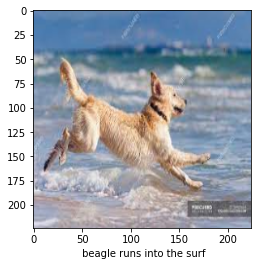

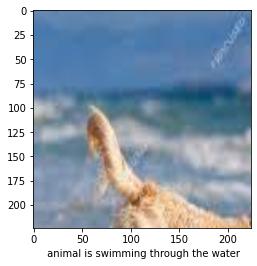

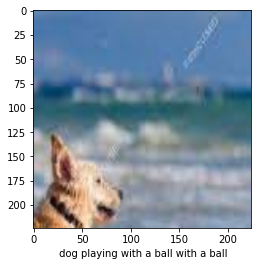

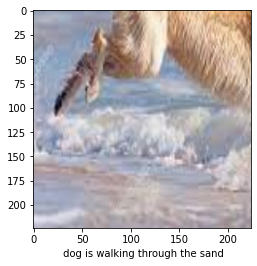

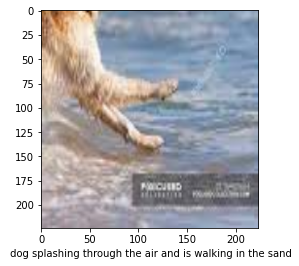

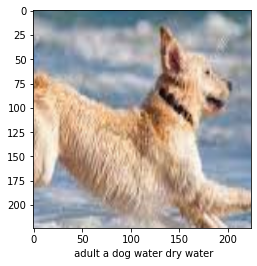

In [53]:
PATH1 = "/content/drive/MyDrive/1. MajorProject/DATASET/Images/dog_2.jfif"
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH1)

**Emotion Extraction**

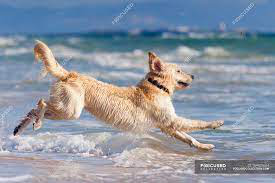

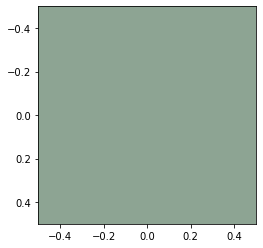

blue: 0.9480224870272148
green: 0.874879021680102
red: 0.9725253001535115
white: 0.7117512017300481
black: 1.0255183140148467

Best Fitting Colour: white

Best Fitting Emotions: pure, clean


In [55]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/dog_2.jfif"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/dog_2.jfif") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

**Poem Generation**

In [26]:
Sent1 = generate_line("flower dancing", 2, 13, model)
Sent2 = generate_line(Sent1 + " happy", 1, 13, model)
Sent3 = generate_line(Sent2 + " beauty", 10, 13, model)
Sent3

"flower dancing certain as happy as beauty masses . as black i'll whom jones with an or"

*Caption 0*

In [54]:
tags = tagIT(primary_caption, dict_map)


WORD		TAG
beagle		noun, singular
runs		verb, 3rd person sing. present takes
into		preposition/subordinating conjunction
the		determiner
surf		noun, singular


In [87]:
sent=[]
for p in tags:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

['beagle', 'runs', 'surf', 'pure', 'clean']

In [93]:
str1 = ""
str1 = sent[0] + " " + sent[1] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[2] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[3] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

"beagle runs sit and dine, surf though back a stain'd,\n pure clean westward father churlishness, a"

*Caption 1*

In [70]:
tags1 = tagIT(crop_caption1, dict_map)

WORD		TAG
animal		noun, singular
is		verb, 3rd person sing. present takes
swimming		gerund/present participle taking
through		preposition/subordinating conjunction
the		determiner
water		noun, singular


In [82]:
sent1=[]
for p in tags1:
  if p[1]=='NN' or p[1][0]=='V':
    sent1.append(p[0])

for i in emotion_list:
  sent1.append(i)
sent1

['animal', 'is', 'swimming', 'water', 'pure', 'clean']

In [86]:
str1 = ""
str1 = sent1[0] + " " + sent1[1] + " " + sent1[2]
gen1 = generate_line(str1, 4, 13, model)
gen1
str2 = gen1 + " " +  sent1[3] + " " +  sent1[4]
gen2 = generate_line(str2, 4, 13, model)
gen2

'animal is swimming stoory is thruff is water pure morning such sieve, he'

*Caption 3*

In [65]:
tags2 = tagIT(crop_caption2, dict_map)

WORD		TAG
dog		noun, singular
playing		gerund/present participle taking
with		preposition/subordinating conjunction
a		determiner
ball		noun, singular
with		preposition/subordinating conjunction
a		determiner
ball		noun, singular


In [116]:
sent1=[]
for p in tags2:
  if p[1]=='NN' or p[1][0]=='V':
    sent1.append(p[0])

for i in emotion_list:
  sent1.append(i)
sent1

str1 = ""
str1 = sent1[0] + " " + sent1[1] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent1[2] 
gen2 = generate_line(str2, 9, 13, model)
str3 = gen2 + " " + emotion_list[0]
gen3 = generate_line(str3, 9, 13, model)
gen3

"dog playing sit and dine, ball ask though back a was guess'd thee flower for pure world, safe were leads; an' friendless an' family of"

*Caption 3*

In [99]:
tags3 = tagIT(crop_caption3, dict_map)

WORD		TAG
dog		noun, singular
is		verb, 3rd person sing. present takes
walking		gerund/present participle taking
through		preposition/subordinating conjunction
the		determiner
sand		noun, singular


In [114]:
sent1=[]
for p in tags3:
  if p[1]=='NN' or p[1][0]=='V':
    sent1.append(p[0])

for i in emotion_list:
  sent1.append(i)
sent1

str1 = ""
str1 = sent1[0] + " " + sent1[1] + " " + sent1[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent1[3] 
gen2 = generate_line(str2, 5, 13, model)
str3 = gen2 + " " + emotion_list[0]
gen3 = generate_line(str3, 9, 13, model)
gen3

'dog is walking of primrose painted sand weeping he he here leave pure or warped smiles in drifting liveried term waters pluck'

*Caption 4*

In [103]:
tags4 = tagIT(crop_caption4, dict_map)

WORD		TAG
dog		noun, singular
splashing		gerund/present participle taking
through		preposition/subordinating conjunction
the		determiner
air		noun, singular
and		coordinating conjunction
is		verb, 3rd person sing. present takes
walking		gerund/present participle taking
in		preposition/subordinating conjunction
the		determiner
sand		noun, singular


In [110]:
sent1=[]
for p in tags4:
  if p[1]=='NN' or p[1][0]=='V':
    sent1.append(p[0])

for i in emotion_list:
  sent1.append(i)
sent1

str1 = ""
str1 = sent1[0] + " " + sent1[1]  
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent1[2] 
gen2 = generate_line(str2, 3, 13, model)
str3 = gen2 + " " + emotion_list[0]
gen3 = generate_line(str3, 9, 13, model)
gen3

"dog splashing sit and dine, air though back a pure to or trustee. how window's did a that hear,"

**Image 2**

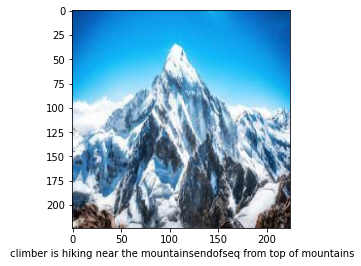

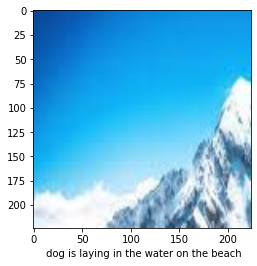

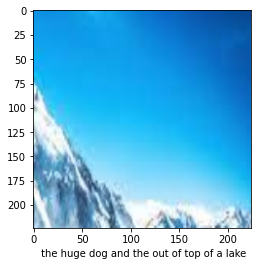

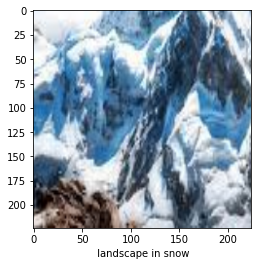

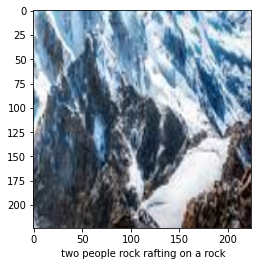

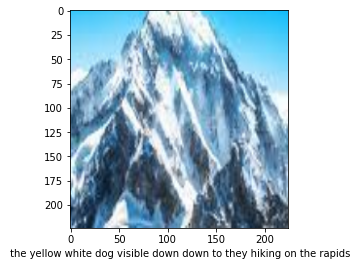

In [27]:
PATH1 = "/content/drive/MyDrive/1. MajorProject/DATASET/Images/alps.jfif"
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH1)

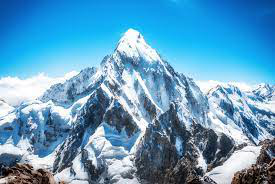

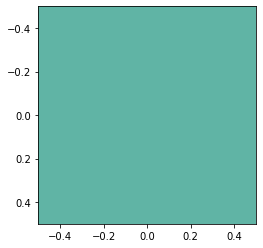

blue: 0.8743954906382141
green: 0.8043136298888099
red: 1.1426915352082898
white: 0.7745073219121312
black: 1.0289242543099402

Best Fitting Colour: white

Best Fitting Emotions: pure, clean


In [30]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/alps.jfif"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/alps.jfif") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

In [40]:
tags3 = tagIT(crop_caption3, dict_map)
sent=[]
for p in tags3:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[3] 
gen2 = generate_line(str2, 8, 13, model)
gen2
#str3 = gen2 + " " +  sent[4] + " " +  sent[4]
#gen3 = generate_line(str3, 4, 13, model)
#gen3

WORD		TAG
landscape		noun, singular
in		preposition/subordinating conjunction
snow		noun, singular


'landscape snow pure wings. the shrine clean rain.” here spring where who child, radiance! could'

In [32]:
tags = tagIT(primary_caption, dict_map)
sent=[]
for p in tags:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[4] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[4] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

WORD		TAG
climber		noun, singular
is		verb, 3rd person sing. present takes
hiking		gerund/present participle taking
near		preposition/subordinating conjunction
the		determiner
mountainsendofseq		noun, singular
from		preposition/subordinating conjunction
top		noun, singular
of		preposition/subordinating conjunction
mountains		noun plural


'climber is hiking stoory is thruff top is morning such sieve, top top are the doth in'

In [37]:
tags2 = tagIT(crop_caption2, dict_map)
sent=[]
for p in tags2:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[4] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[4] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

WORD		TAG
the		determiner
huge		adjective
dog		noun, singular
and		coordinating conjunction
the		determiner
out		noun, singular
of		preposition/subordinating conjunction
top		noun, singular
of		preposition/subordinating conjunction
a		determiner
lake		noun, singular


'dog out top height, we spearman pure leads my lustes daffodils pure pure them dik! i with'

In [42]:
tags4 = tagIT(crop_caption4, dict_map)
sent=[]
for p in tags4:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[4] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[4] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

WORD		TAG
two		cardinal digit
people		noun plural
rock		verb, sing. present, non-3d take
rafting		gerund/present participle taking
on		preposition/subordinating conjunction
a		determiner
rock		noun, singular


"rock rafting rock sit and dine, clean baker not below? shadows clean clean t' of the gipsy"

In [44]:
tags5 = tagIT(crop_caption5, dict_map)
sent=[]
for p in tags5:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[3] 
gen2 = generate_line(str2, 4, 13, model)
gen2
#str3 = gen2 + " " +  sent[4] + " " +  sent[4]
#gen3 = generate_line(str3, 4, 13, model)
#gen3

WORD		TAG
the		determiner
yellow		adjective
white		adjective
dog		noun, singular
visible		adjective
down		adverb
down		adverb
to		None
they		personal pronoun I, he, she
hiking		gerund/present participle taking
on		preposition/subordinating conjunction
the		determiner
rapids		noun plural


'dog hiking pure was air through clean length were is i'

**Image 3**

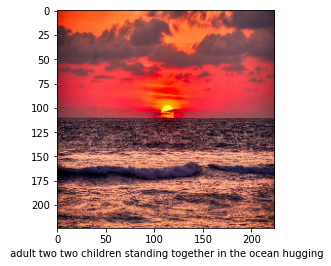

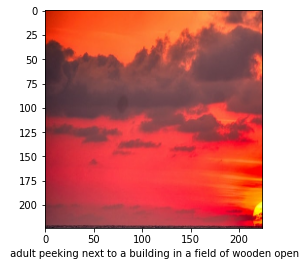

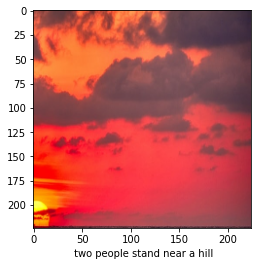

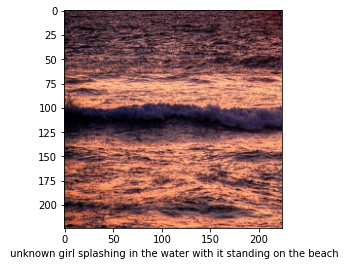

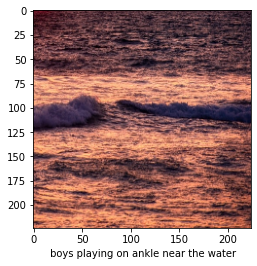

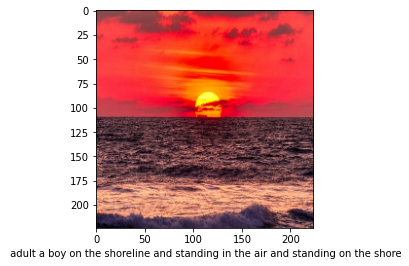

In [45]:
PATH1 = "/content/drive/MyDrive/1. MajorProject/DATASET/Images/sunset_beach.jfif"
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH1)

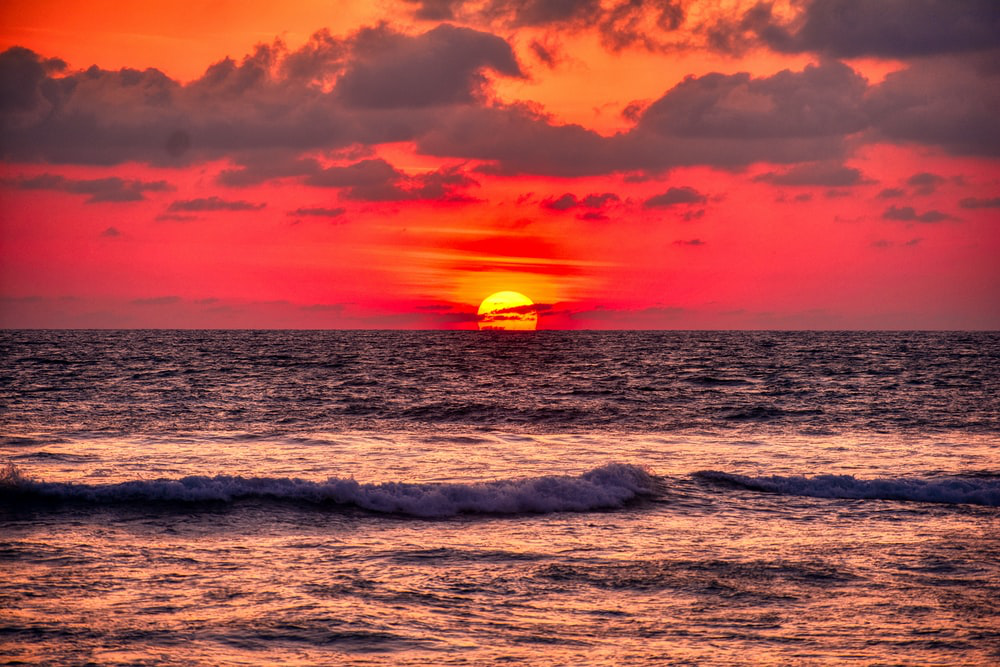

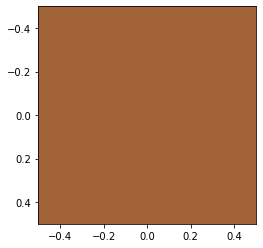

blue: 1.078581094776122
green: 0.9088906843221983
red: 0.5761637171749454
white: 1.0565407490859244
black: 0.7762427869442446

Best Fitting Colour: red

Best Fitting Emotions: passionate, energized, excited


In [46]:
PATH="/content/drive/MyDrive/1. MajorProject/DATASET/Images/sunset_beach.jfif"
image = Image.open(r"/content/drive/MyDrive/1. MajorProject/DATASET/Images/sunset_beach.jfif") 
display(image)

dominant_colors, major_colour = find_dominant_colours(PATH)
dominant_colors

emotion_list = colour_to_emotion(major_colour)
#emotion_list

In [47]:
tags3 = tagIT(crop_caption3, dict_map)
sent=[]
for p in tags3:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[3] 
gen2 = generate_line(str2, 8, 13, model)
gen2
#str3 = gen2 + " " +  sent[4] + " " +  sent[4]
#gen3 = generate_line(str3, 4, 13, model)
#gen3

WORD		TAG
unknown		adjective
girl		noun, singular
splashing		noun, singular
in		preposition/subordinating conjunction
the		determiner
water		noun, singular
with		preposition/subordinating conjunction
it		personal pronoun I, he, she
standing		gerund/present participle taking
on		preposition/subordinating conjunction
the		determiner
beach		noun, singular


'girl splashing water thy cities we standing your our back to hostile, is a as'

In [49]:
tags1 = tagIT(crop_caption1, dict_map)
sent=[]
for p in tags1:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[4] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[4] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

WORD		TAG
adult		noun, singular
peeking		gerund/present participle taking
next		adjective
to		None
a		determiner
building		noun, singular
in		preposition/subordinating conjunction
a		determiner
field		noun, singular
of		preposition/subordinating conjunction
wooden		adjective
open		adjective


"adult peeking building sit and dine, passionate ask though back a passionate passionate was guess'd thee flower"

In [50]:
tags = tagIT(primary_caption, dict_map)
sent=[]
for p in tags:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[4] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[4] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

WORD		TAG
adult		adverb
two		cardinal digit
two		cardinal digit
children		noun plural
standing		gerund/present participle taking
together		adverb
in		preposition/subordinating conjunction
the		determiner
ocean		noun, singular
hugging		noun, singular


'standing ocean hugging look as nature energized to entreated; now i energized energized through by the sitting,'

In [51]:
tags3 = tagIT(crop_caption3, dict_map)
sent=[]
for p in tags3:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[4] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[4] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

WORD		TAG
unknown		adjective
girl		noun, singular
splashing		noun, singular
in		preposition/subordinating conjunction
the		determiner
water		noun, singular
with		preposition/subordinating conjunction
it		personal pronoun I, he, she
standing		gerund/present participle taking
on		preposition/subordinating conjunction
the		determiner
beach		noun, singular


'girl splashing water thy cities we beach your our back to beach beach hostile, is a as'

In [52]:
tags4 = tagIT(crop_caption4, dict_map)
sent=[]
for p in tags4:
  if p[1]=='NN' or p[1][0]=='V':
    sent.append(p[0])

for i in emotion_list:
  sent.append(i)
sent

str1 = ""
str1 = sent[0] + " " + sent[1] + " " + sent[2] 
gen1 = generate_line(str1, 3, 13, model)
gen1
str2 = gen1 + " " + sent[4] 
gen2 = generate_line(str2, 4, 13, model)
gen2
str3 = gen2 + " " +  sent[4] + " " +  sent[4]
gen3 = generate_line(str3, 4, 13, model)
gen3

WORD		TAG
boys		noun plural
playing		gerund/present participle taking
on		preposition/subordinating conjunction
ankle		noun, singular
near		preposition/subordinating conjunction
the		determiner
water		noun, singular


'playing ankle water thy cities we energized your our back to energized energized hostile, is a as'